In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(8967)

In [81]:
n_samples = 10000

avg_birthweight_M = 3.4
avg_birthweight_F = 3.3

bw_intercept_M = 70
bw_intercept_F = 60

bw_coef_M = 6
bw_coef_F = 5

# Create a simple dataset
data = {
    'ID': range(1, n_samples + 1),
    'sex': np.random.randint(0, 2, n_samples),  # 0: male, 1: female
    'education': np.random.randint(1, 5, n_samples),  # 1: primary to 4: higher education
}
df = pd.DataFrame(data)
n_m = len(df[df['sex'] == 0])
n_f = len(df[df['sex'] == 1])
assert n_m + n_f == n_samples

m_mask = df['sex'] == 0
f_mask = df['sex'] == 1

df.loc[m_mask, 'birth_weight'] = np.round(np.random.normal(avg_birthweight_M, 0.5, n_m), 2)
df.loc[f_mask, 'birth_weight'] = np.round(np.random.normal(avg_birthweight_F, 0.5, n_f), 2)
 
# Create correlation between birth weight and adult weight
df.loc[m_mask, 'adult_body_weight'] = bw_intercept_M + bw_coef_M * df.loc[m_mask, 'birth_weight'] + np.random.normal(0, 3.5, n_m)
df.loc[f_mask, 'adult_body_weight'] = bw_intercept_F + bw_coef_F * df.loc[f_mask, 'birth_weight'] + np.random.normal(0, 2.5, n_f)

df['height'] = 0.85 + df['adult_body_weight'] * 0.01
df['height'] += np.random.normal(0, 0.05, n_samples)

n_negative_height = 57
negative_height_mask = np.random.choice(range(n_samples), n_negative_height, replace=False)
df.loc[negative_height_mask, 'height'] = np.random.normal(-0.2, 0.15, n_negative_height)

n_height_outliers = 30
height_outlier_mask = np.random.choice(range(n_samples), n_height_outliers, replace=False)
df.loc[height_outlier_mask, 'height'] = np.random.normal(3.5, 0.5, n_height_outliers)

n_missing_height = 150
missing_height_mask = np.random.choice(range(n_samples), n_missing_height, replace=False)
df.loc[missing_height_mask, 'height'] = np.nan

df['salary'] = df['education'] * 15000 + 5000
df['salary'] += np.random.normal(0, 5000, n_samples)

# Create correlation between education, salary and depression symptoms
df['depression_symptoms'] = np.random.normal(50, 10, n_samples)
df['depression_symptoms'] -= 2 * (df['education'])
df['depression_symptoms'] -= 0.0002 * (df['salary'])
df.loc[m_mask, 'depression_symptoms'] += 0.5 * df.loc[m_mask, 'education'] * df.loc[m_mask, 'salary'] / 20000
df.loc[f_mask, 'depression_symptoms'] -= 0.25 * df.loc[f_mask, 'education'] * df.loc[f_mask, 'salary'] / 20000
# Ensure depression symptoms values are in reasonable ranges
df['depression_symptoms'] = np.clip(df['depression_symptoms'], 0, 100)

# Add salary outliers
n_salary_outliers = 227
salary_outliers_mask = np.random.choice(range(n_samples), n_salary_outliers, replace=False)
df.loc[salary_outliers_mask, 'salary'] = np.random.normal(500000, 200000, n_salary_outliers)

# Save 
df.to_csv('cohort-data.csv', index=False)

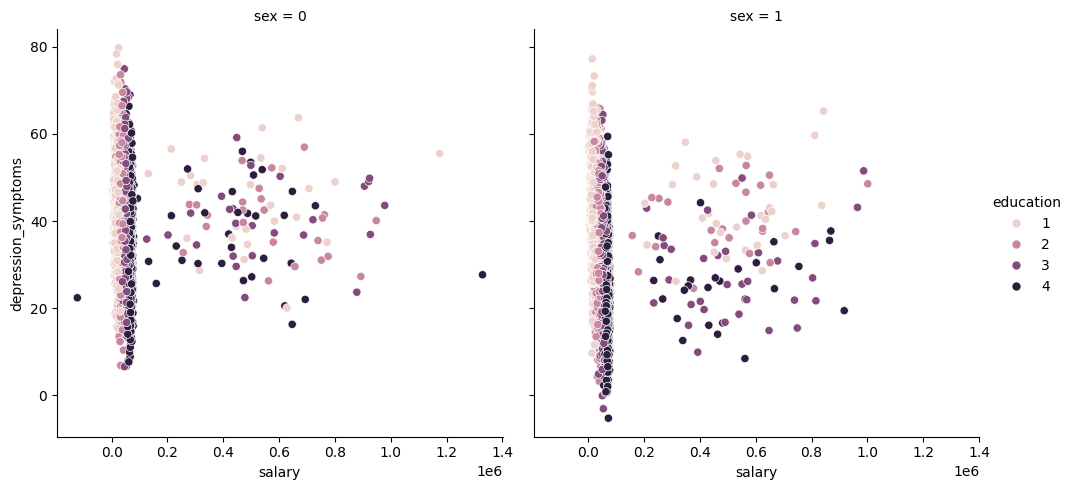

In [80]:
sns.relplot(df, x='salary', y='depression_symptoms', hue='education', col='sex', kind='scatter')

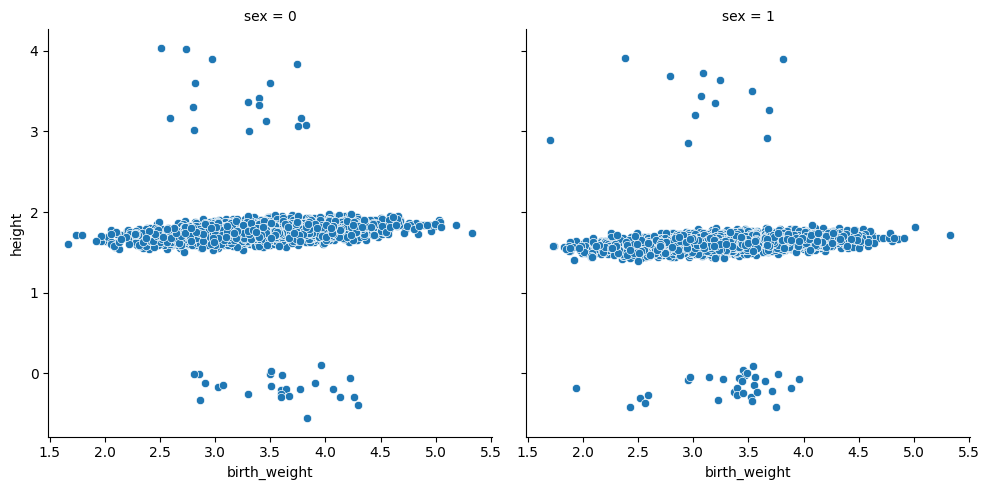

In [62]:
sns.relplot(df, x='birth_weight', y='height', col='sex', kind='scatter')